# 第3章 音声処理の基礎と特徴量抽出

In [2]:
# リポジトリを複製する
!git clone https://github.com/dfukagaw28/python_asr.git

Cloning into 'python_asr'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 137 (delta 56), reused 119 (delta 47), pack-reused 4
Receiving objects: 100% (137/137), 221.47 KiB | 1.91 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [3]:
# Google Drive のデータをマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Google Drive へのシンボリックリンクを作成する
!ln -sf /content/drive/MyDrive/data/python_asr/ /content/python_asr/data

In [16]:
%ls /content/python_asr/data/

label/  original/  wav/


## 特徴量データを Google Drive に置くための準備

この後で作成するデータは，作成にかなりの時間がかかる。Google Drive に置くことができるように細工をしておく。

In [35]:
!mkdir -p /content/python_asr/data/fbank
!ln -sf /content/python_asr/data/fbank /content/python_asr/01compute_features/fbank

In [65]:
!mkdir -p /content/python_asr/data/mfcc
!ln -sf /content/python_asr/data/mfcc /content/python_asr/01compute_features/mfcc

## 第3.2節 音声ファイルを読み込んでみよう

In [17]:
%cd /content/python_asr/01compute_features

/content/python_asr/01compute_features


In [18]:
%ls -l ../data/wav/BASIC5000_0001.wav

-rw------- 1 root root 102124 Jun 11 21:47 ../data/wav/BASIC5000_0001.wav


In [19]:
%run plot_wave.py

Sampling Frequency: 16000 [Hz]
Sample Size: 2 [Byte]
Number of Channels: 1
Number of Samples: 51040


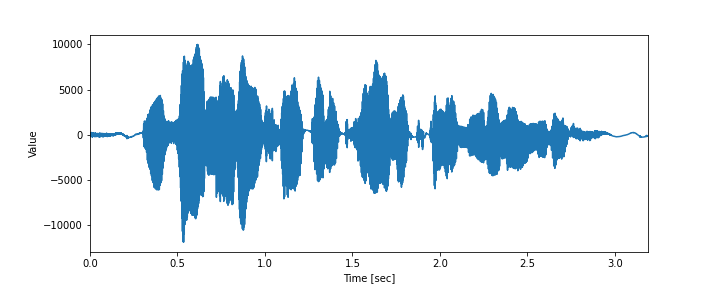

In [20]:
from IPython.display import Image,display_png
display_png(Image('plot.png'))

In [21]:
from IPython.display import Audio
Audio('../data/wav/BASIC5000_0001.wav')

## 第3.3節 フーリエ変換を使って音声を周波数分解しよう

In [22]:
%cd /content/python_asr/01compute_features

/content/python_asr/01compute_features


In [23]:
%run test_fft.py

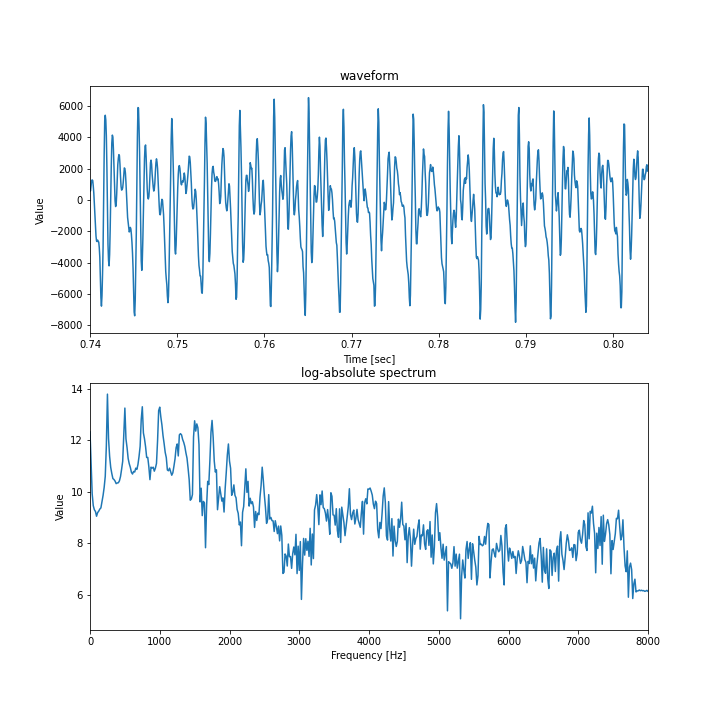

In [24]:
from IPython.display import Image,display_png
display_png(Image('spectrum.png'))

## 第3.4節 音声を短時間フーリエ変換してスペクトログラムを作成しよう

In [25]:
%cd /content/python_asr/01compute_features
%run test_spectrogram.py

/content/python_asr/01compute_features


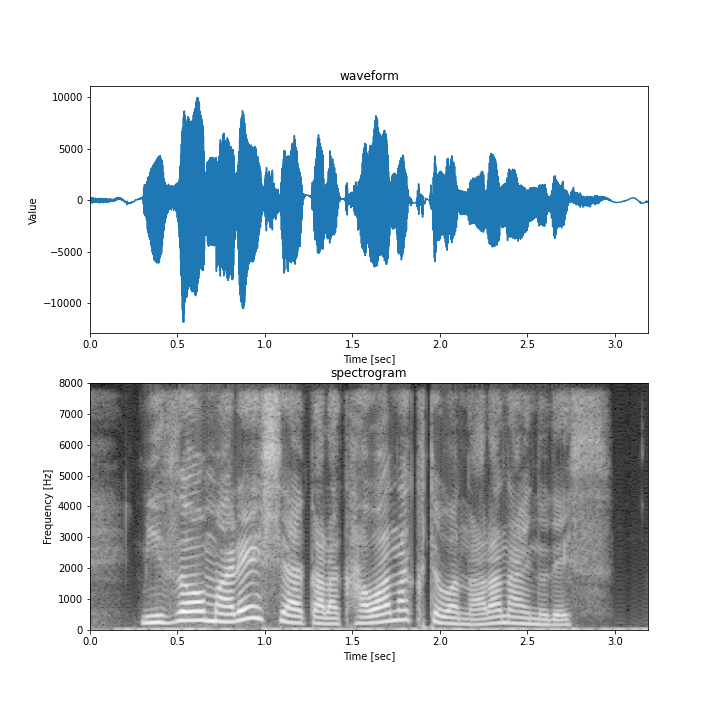

In [26]:
from IPython.display import Image,display_png
display_png(Image('spectrogram.png'))

## 第3.5節 対数メルフィルタバンク特徴量

**注意！**

ここはかなり時間がかかる（50分かかった）。
Colab だと油断すると放置して切断されてしまうかもしれないので注意。

In [27]:
%cd /content/python_asr/01compute_features
%run 01_compute_fbank.py

/content/python_asr/01compute_features
Input wav_scp: ../data/label/train_small/wav.scp
Output directory: ./fbank/train_small
Input wav_scp: ../data/label/train_large/wav.scp
Output directory: ./fbank/train_large
Input wav_scp: ../data/label/dev/wav.scp
Output directory: ./fbank/dev
Input wav_scp: ../data/label/test/wav.scp
Output directory: ./fbank/test


少しコードを書き換えて，データセットを選べるようにした。
全体の実行時間は変わらないが部分実行できるようになった。

In [47]:
%cd /content/python_asr/01compute_features
%run 01_compute_fbank.py dev

/content/python_asr/01compute_features
Input wav_scp: ../data/label/dev/wav.scp
Output directory: fbank/dev


In [29]:
!ls ./fbank/

dev  test  train_large	train_small


In [30]:
!du -sm ./fbank/*

16	./fbank/dev
16	./fbank/test
351	./fbank/train_large
64	./fbank/train_small


In [52]:
! for f in ./fbank/*; do echo $f; ls $f/*.bin | wc; done

./fbank/dev
    250     250    7750
./fbank/test
    250     250    8000
./fbank/train_large
   4500    4500  175500
./fbank/train_small
   1000    1000   39000


In [54]:
!wc ./fbank/train_small/feats.scp

 1000  4000 98005 ./fbank/train_small/feats.scp


In [55]:
!head ./fbank/train_small/feats.scp

BASIC5000_0501 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0501.bin 402 40
BASIC5000_0502 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0502.bin 391 40
BASIC5000_0503 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0503.bin 366 40
BASIC5000_0504 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0504.bin 346 40
BASIC5000_0505 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0505.bin 355 40
BASIC5000_0506 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0506.bin 279 40
BASIC5000_0507 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0507.bin 352 40
BASIC5000_0508 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0508.bin 532 40
BASIC5000_0509 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0509.bin 368 40
BASIC5000_0510 /content/python_asr/01compute_features/fbank/train_small/BASIC5000_0510.bin 310 40


## 第3.6節 メル周波数ケプストラム特徴量

### ケプストラム分析

In [59]:
%cd /content/python_asr/01compute_features
%run test_cepstrum.py

/content/python_asr/01compute_features


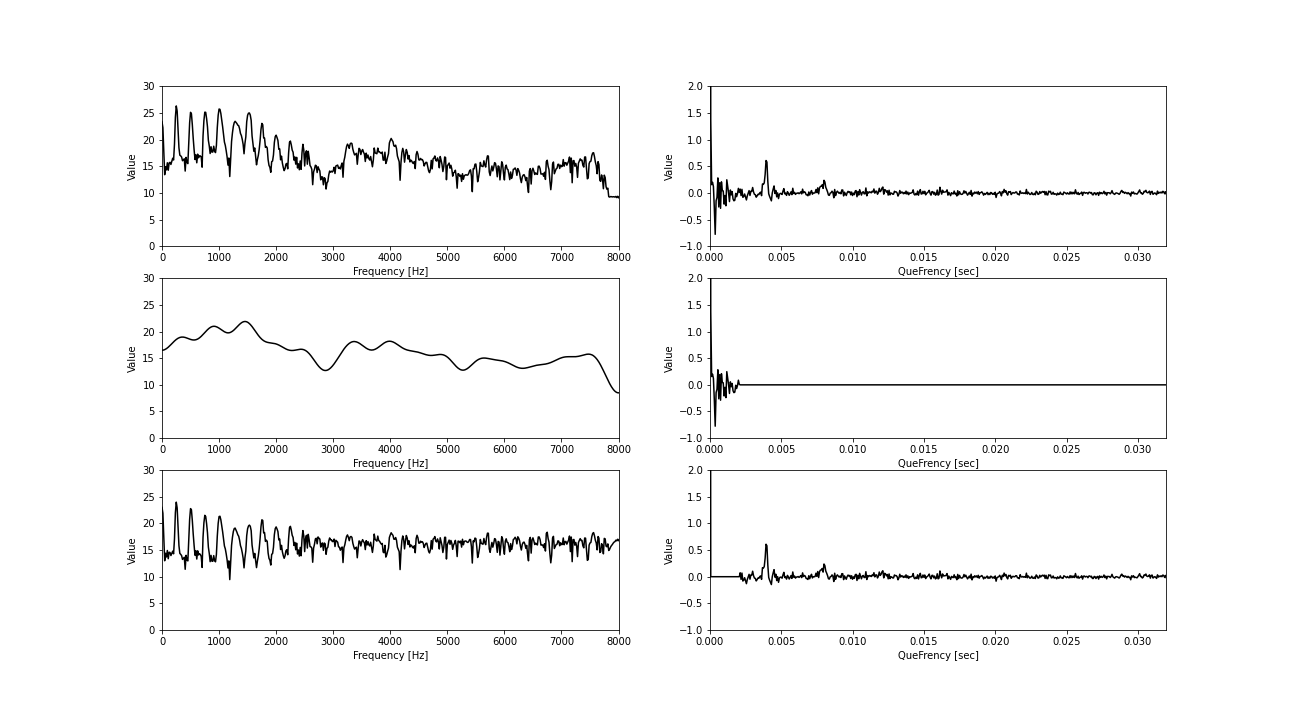

In [57]:
from IPython.display import Image,display_png
display_png(Image('cepstrum.png'))

### メル周波数ケプストラム特徴量

ここも，そこそこ時間がかかる（7分くらいかかった）。

In [66]:
%cd /content/python_asr/01compute_features
%run 01_compute_mfcc.py

/content/python_asr/01compute_features
Specify dataset:
  train_small train_large dev test


In [67]:
%cd /content/python_asr/01compute_features
%run 01_compute_mfcc.py train_small train_large dev test

/content/python_asr/01compute_features
Input wav_scp: ../data/label/train_small/wav.scp
Output directory: mfcc/train_small
Input wav_scp: ../data/label/train_large/wav.scp
Output directory: mfcc/train_large
Input wav_scp: ../data/label/dev/wav.scp
Output directory: mfcc/dev
Input wav_scp: ../data/label/test/wav.scp
Output directory: mfcc/test


In [68]:
!du -sm ./mfcc/*

5	./mfcc/dev
5	./mfcc/test
113	./mfcc/train_large
21	./mfcc/train_small


In [69]:
! for f in ./mfcc/*; do echo $f; ls $f/*.bin | wc; done

./mfcc/dev
    250     250    7500
./mfcc/test
    250     250    7750
./mfcc/train_large
   4500    4500  171000
./mfcc/train_small
   1000    1000   38000


In [70]:
!wc ./mfcc/train_small/feats.scp

 1000  4000 97005 ./mfcc/train_small/feats.scp


In [71]:
!head ./mfcc/train_small/feats.scp

BASIC5000_0501 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0501.bin 402 13
BASIC5000_0502 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0502.bin 391 13
BASIC5000_0503 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0503.bin 366 13
BASIC5000_0504 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0504.bin 346 13
BASIC5000_0505 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0505.bin 355 13
BASIC5000_0506 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0506.bin 279 13
BASIC5000_0507 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0507.bin 352 13
BASIC5000_0508 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0508.bin 532 13
BASIC5000_0509 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0509.bin 368 13
BASIC5000_0510 /content/python_asr/01compute_features/mfcc/train_small/BASIC5000_0510.bin 310 13


## 第3.7節 特徴量の平均と標準偏差を計算してみよう

In [72]:
%cd /content/python_asr/01compute_features
%run 02_compute_mean_std.py

/content/python_asr/01compute_features
Input feat_scp: ./fbank/train_small/feats.scp
Output file: ./fbank/train_small/mean_std.txt
Input feat_scp: ./fbank/train_large/feats.scp
Output file: ./fbank/train_large/mean_std.txt
Input feat_scp: ./mfcc/train_small/feats.scp
Output file: ./mfcc/train_small/mean_std.txt
Input feat_scp: ./mfcc/train_large/feats.scp
Output file: ./mfcc/train_large/mean_std.txt


In [75]:
%ls -l ./*/*/mean_std.txt

-rw------- 1 root root 1051 Jun 12 00:22 ./fbank/train_large/mean_std.txt
-rw------- 1 root root 1051 Jun 12 00:22 ./fbank/train_small/mean_std.txt
-rw------- 1 root root  360 Jun 12 00:22 ./mfcc/train_large/mean_std.txt
-rw------- 1 root root  360 Jun 12 00:22 ./mfcc/train_small/mean_std.txt


In [76]:
!wc ./*/*/mean_std.txt

   4   82 1051 ./fbank/train_large/mean_std.txt
   4   82 1051 ./fbank/train_small/mean_std.txt
   4   28  360 ./mfcc/train_large/mean_std.txt
   4   28  360 ./mfcc/train_small/mean_std.txt
  16  220 2822 total


In [77]:
%cat ./fbank/train_small/mean_std.txt

mean
1.116243e+01 1.172538e+01 1.312749e+01 1.424538e+01 1.424501e+01 1.417060e+01 1.420551e+01 1.456143e+01 1.459908e+01 1.436033e+01 1.385732e+01 1.376048e+01 1.377353e+01 1.379427e+01 1.387089e+01 1.391624e+01 1.394004e+01 1.403686e+01 1.427108e+01 1.434181e+01 1.430499e+01 1.426060e+01 1.430279e+01 1.460058e+01 1.477020e+01 1.473919e+01 1.470755e+01 1.466379e+01 1.487970e+01 1.522020e+01 1.521580e+01 1.483269e+01 1.447198e+01 1.446942e+01 1.478631e+01 1.500018e+01 1.486494e+01 1.519755e+01 1.590928e+01 1.598335e+01 
std
1.939400e+00 3.980573e+00 5.011706e+00 5.531526e+00 5.631005e+00 5.573920e+00 5.388234e+00 5.480359e+00 5.495014e+00 5.358706e+00 5.146300e+00 5.102542e+00 5.029107e+00 4.812071e+00 4.655306e+00 4.639140e+00 4.614736e+00 4.561507e+00 4.545991e+00 4.472861e+00 4.371383e+00 4.262149e+00 4.179880e+00 4.183995e+00 4.204616e+00 4.186942e+00 4.152922e+00 4.051317e+00 4.027987e+00 4.099430e+00 4.134773e+00 4.061184e+00 3.992896e+00 4.031596e+00 4.039210e+00 3.982123e+00 3.